In [19]:
from functions import read_excel, preprocess_dataframe, describe_dataframe
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Read the data
df1 = read_excel('idtobank.xlsx')
df2 = read_excel('hashtoid.xlsx')
fraud_data = read_excel('fraud.xlsx', sheet_name='Detail data')

df1 = preprocess_dataframe(df1)
df2 = preprocess_dataframe(df2)

df = pd.concat([df1, df2], ignore_index=True)
fraud_ids = fraud_data['customer_id'].unique()
df['is_fraud'] = df['customer_id'].isin(fraud_ids).astype(object)

df = df.drop_duplicates()

describe_dataframe(df)

Number of rows: 4063
Number of columns: 57

Column names and data types:
success_redirect_url               object
account_details                    object
expires_at                         object
client                             object
fee                                object
refunded_amount                    object
payment_channel_transaction_id     object
linked_account_id                  object
is_otp_required                    object
otp_mobile_number                  object
settlement_date                    object
failure_code                       object
callback_url                       object
status                             object
channel_account_reference          object
updated                            object
version                            object
checkout_url                       object
vat                                object
client_type                        object
id                                 object
status2                            object
pay

In [21]:
# Preprocessing

# Drop columns that are not useful for the model
drop_columns = [
    'internal_metadata', 'description','mobile_number', 'otp_mobile_number', 'client_reference',
    'version', 'entity', 'type', 'client', 'status2', 'given_names', 'transacting_entity', 'connector_metadata',
    'refunded_amount', 'vat','currency', 'is_otp_required','fee']

df = df.drop(columns=drop_columns)

# Convert 'is_fraud' to numeric (boolean to int)
df['is_fraud'] = df['is_fraud'].astype(int)

# Convert 'amount' to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Sort 'amount' into 10 bins of ascending value
df['amount_bins'] = pd.qcut(df['amount'], 20, labels=False, duplicates='drop') + 1

# Verify the bins
print(df[['amount', 'amount_bins']].head(20))

      amount  amount_bins
0   10005.00           11
1    3157.82            8
2    3157.00            8
3    9877.16           11
4   20005.00           15
5    3981.00            8
6   20005.00           15
7   20005.00           15
8   20005.00           15
9   20005.00           15
10  20005.00           15
11  12353.26           13
12  11296.06           13
13  10348.26           12
14  11296.00           13
15  20005.00           15
16  20005.00           15
17  10005.00           11
18   1805.00            5
19  10005.00           11


In [22]:
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]

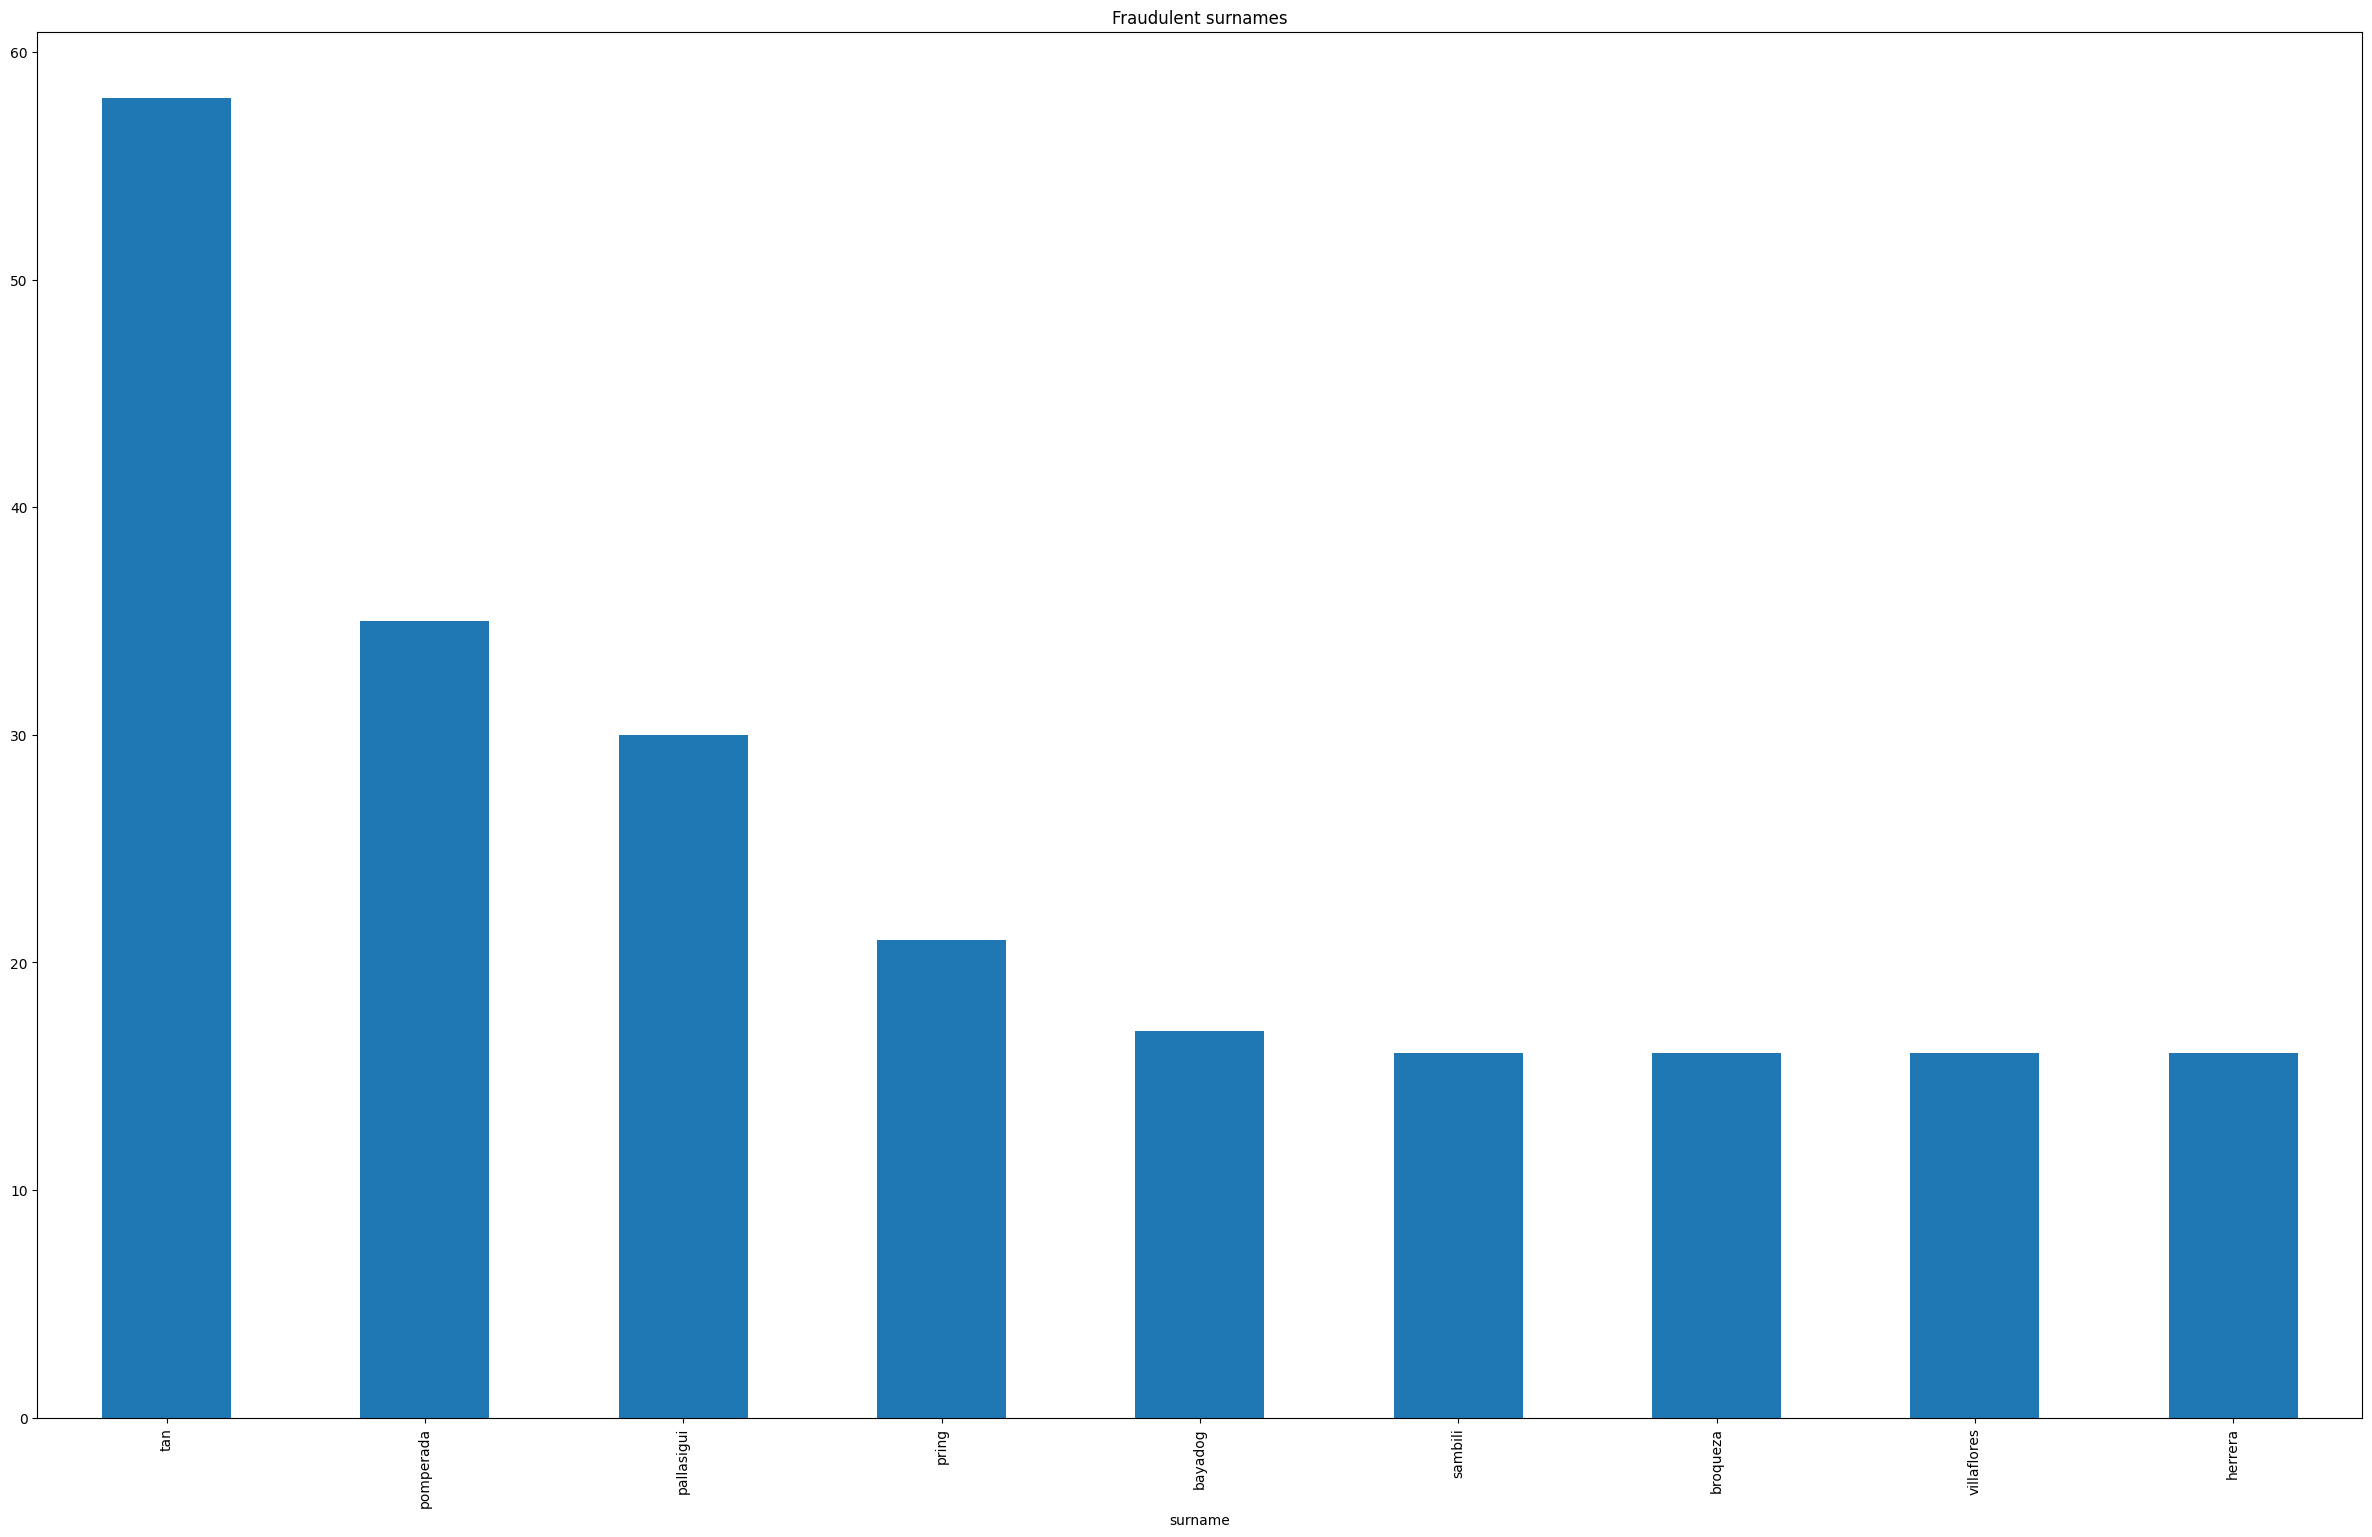

In [23]:
# Plot the number of fraudulent transactions per surname
plt.figure(figsize=(30, 18))
fraud['surname'].value_counts().loc[lambda x: x > 15].plot(kind='bar', title='Fraudulent surnames')
plt.show()


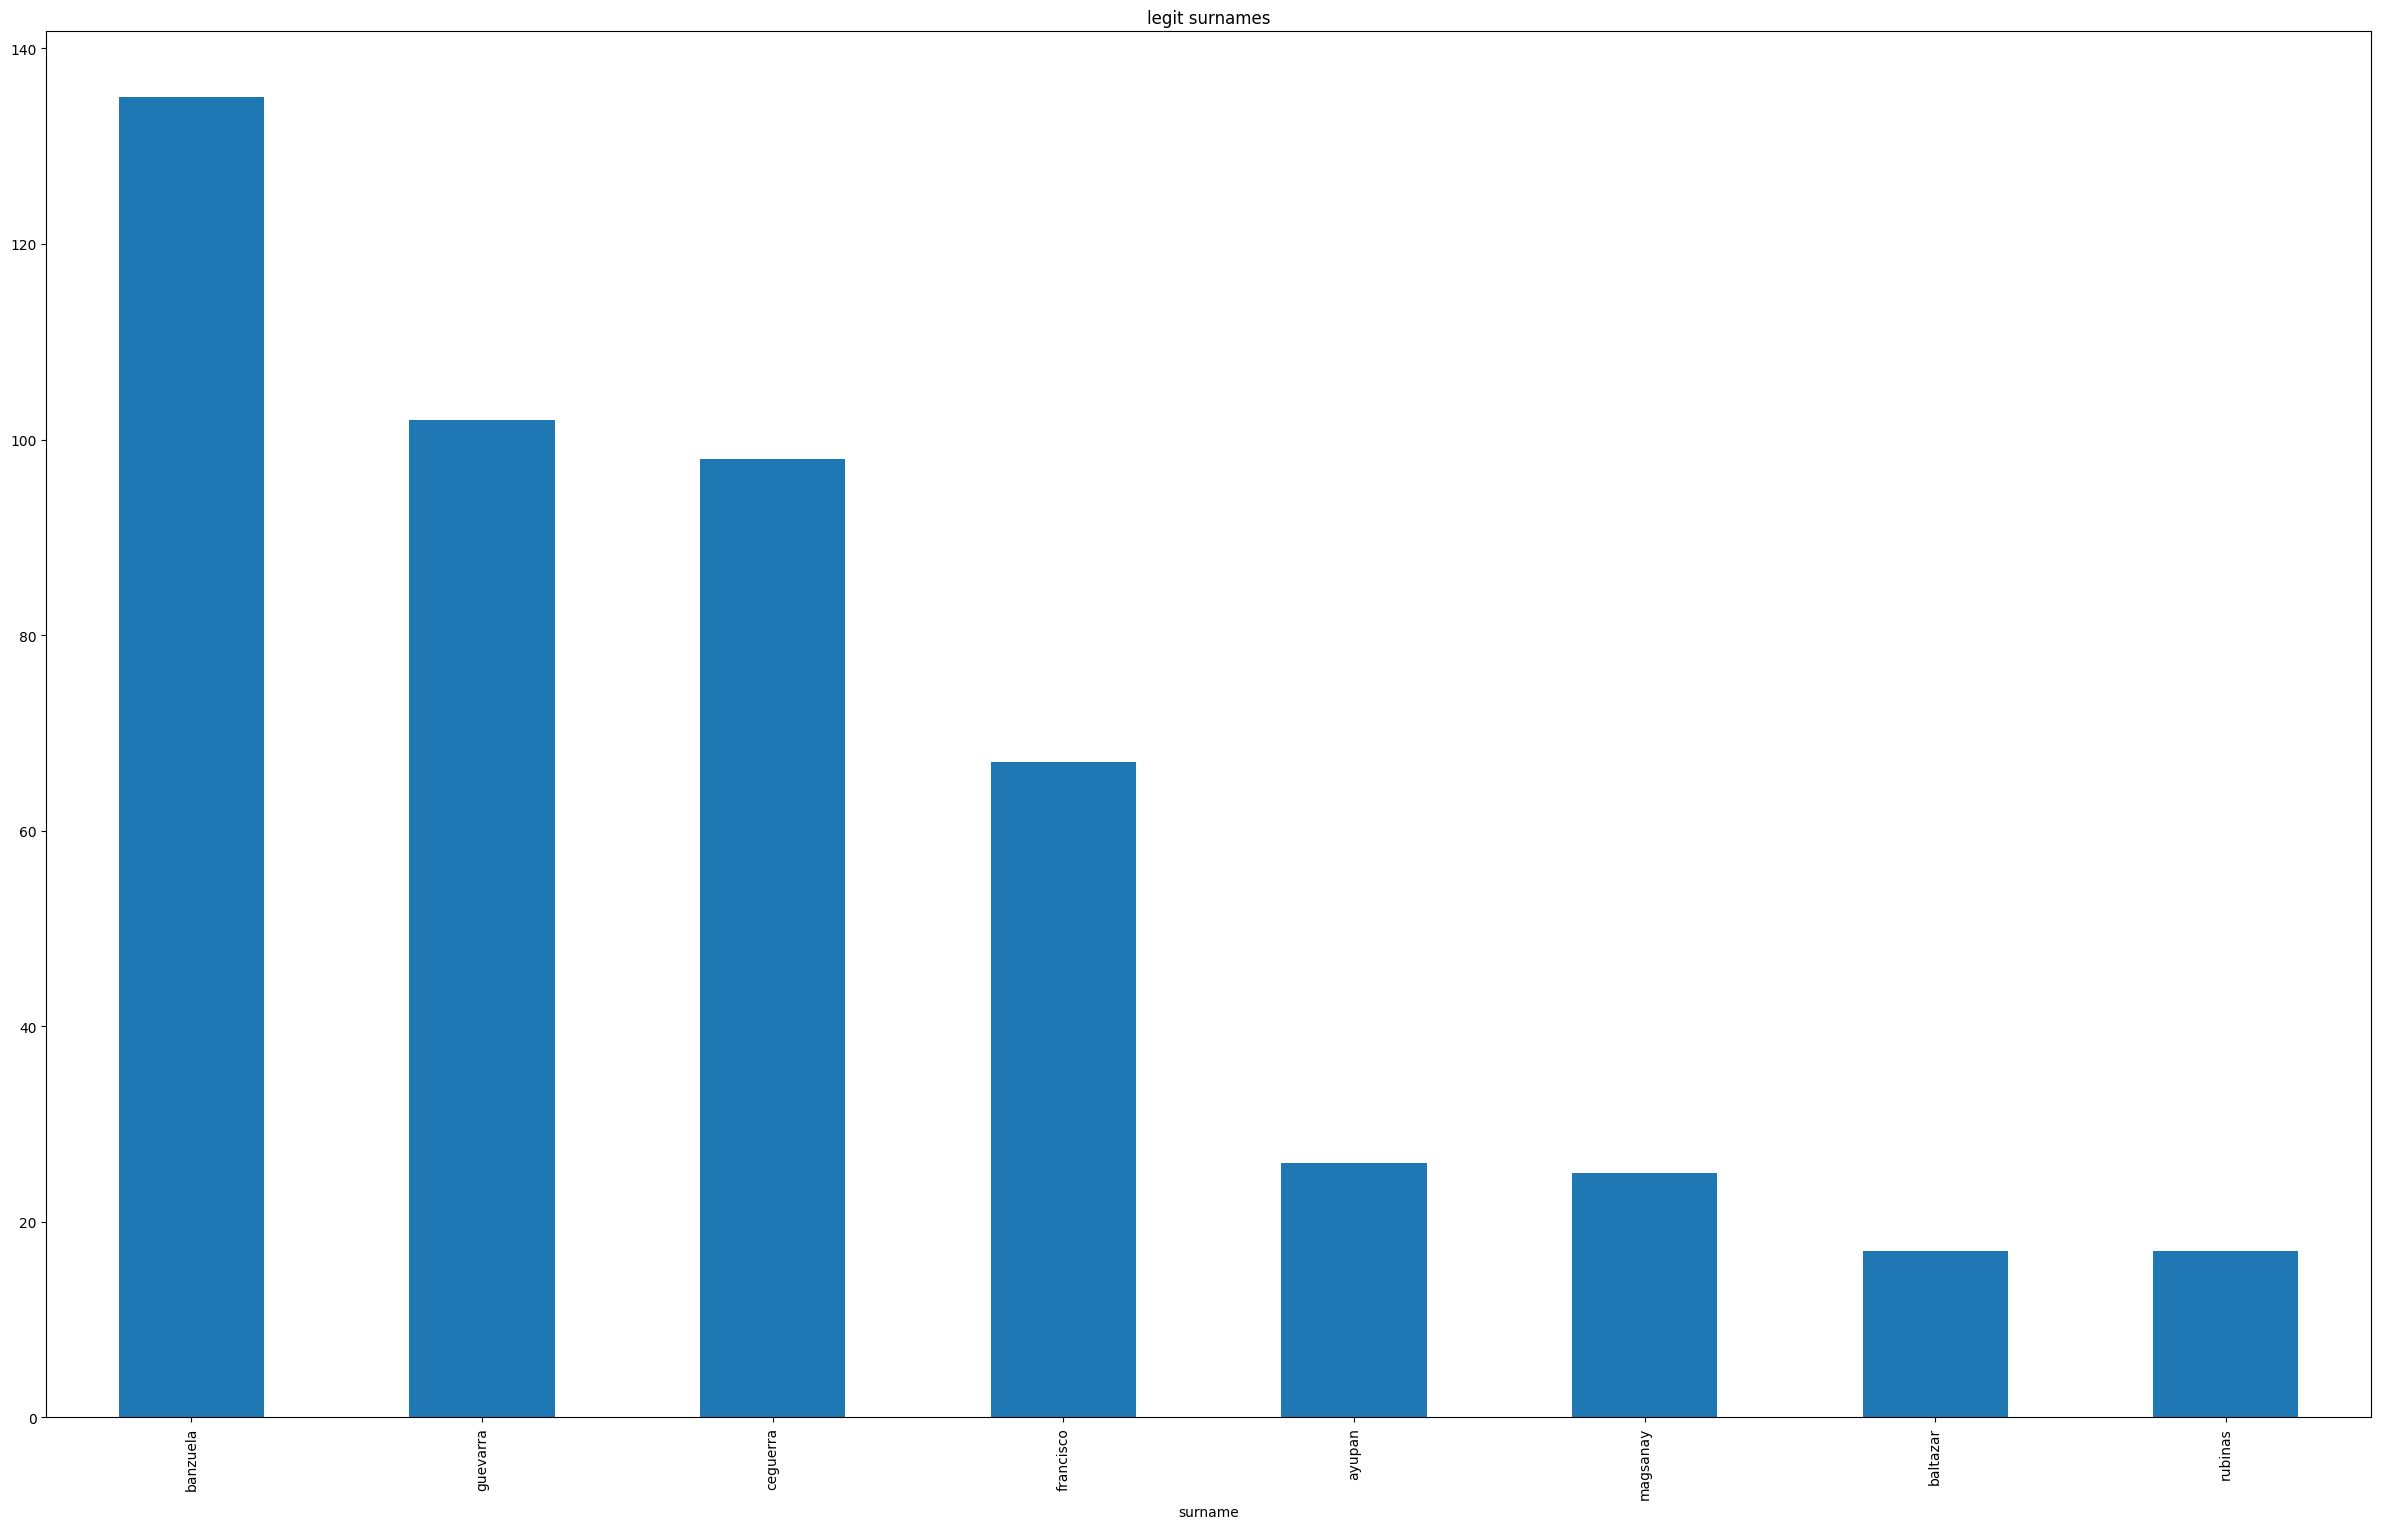

In [24]:
# Plot the number of legit transactions per surname
plt.figure(figsize=(30, 18))
not_fraud['surname'].value_counts().loc[lambda x: x > 15].plot(kind='bar', title='legit surnames')
plt.show()

In [25]:
# Define the surname to check
surname_to_check = 'tan'

# Probability given transaction is fraud
probability_fraud = (fraud['surname'] == surname_to_check).mean()

# Probability given transaction is not fraud
probability_not_fraud = (not_fraud['surname'] == surname_to_check).mean()

probability_random = (df['surname'] == surname_to_check).mean()


# Print probabilities
print(f"Probability of surname '{surname_to_check}' given transaction is fraud: {probability_fraud:.4f}")
print(f"Probability of surname '{surname_to_check}' given transaction is not fraud: {probability_not_fraud:.4f}")
print(f"Probability of surname '{surname_to_check}' given transaction is random: {probability_random:.4f}")

Probability of surname 'tan' given transaction is fraud: 0.0323
Probability of surname 'tan' given transaction is not fraud: 0.0026
Probability of surname 'tan' given transaction is random: 0.0158


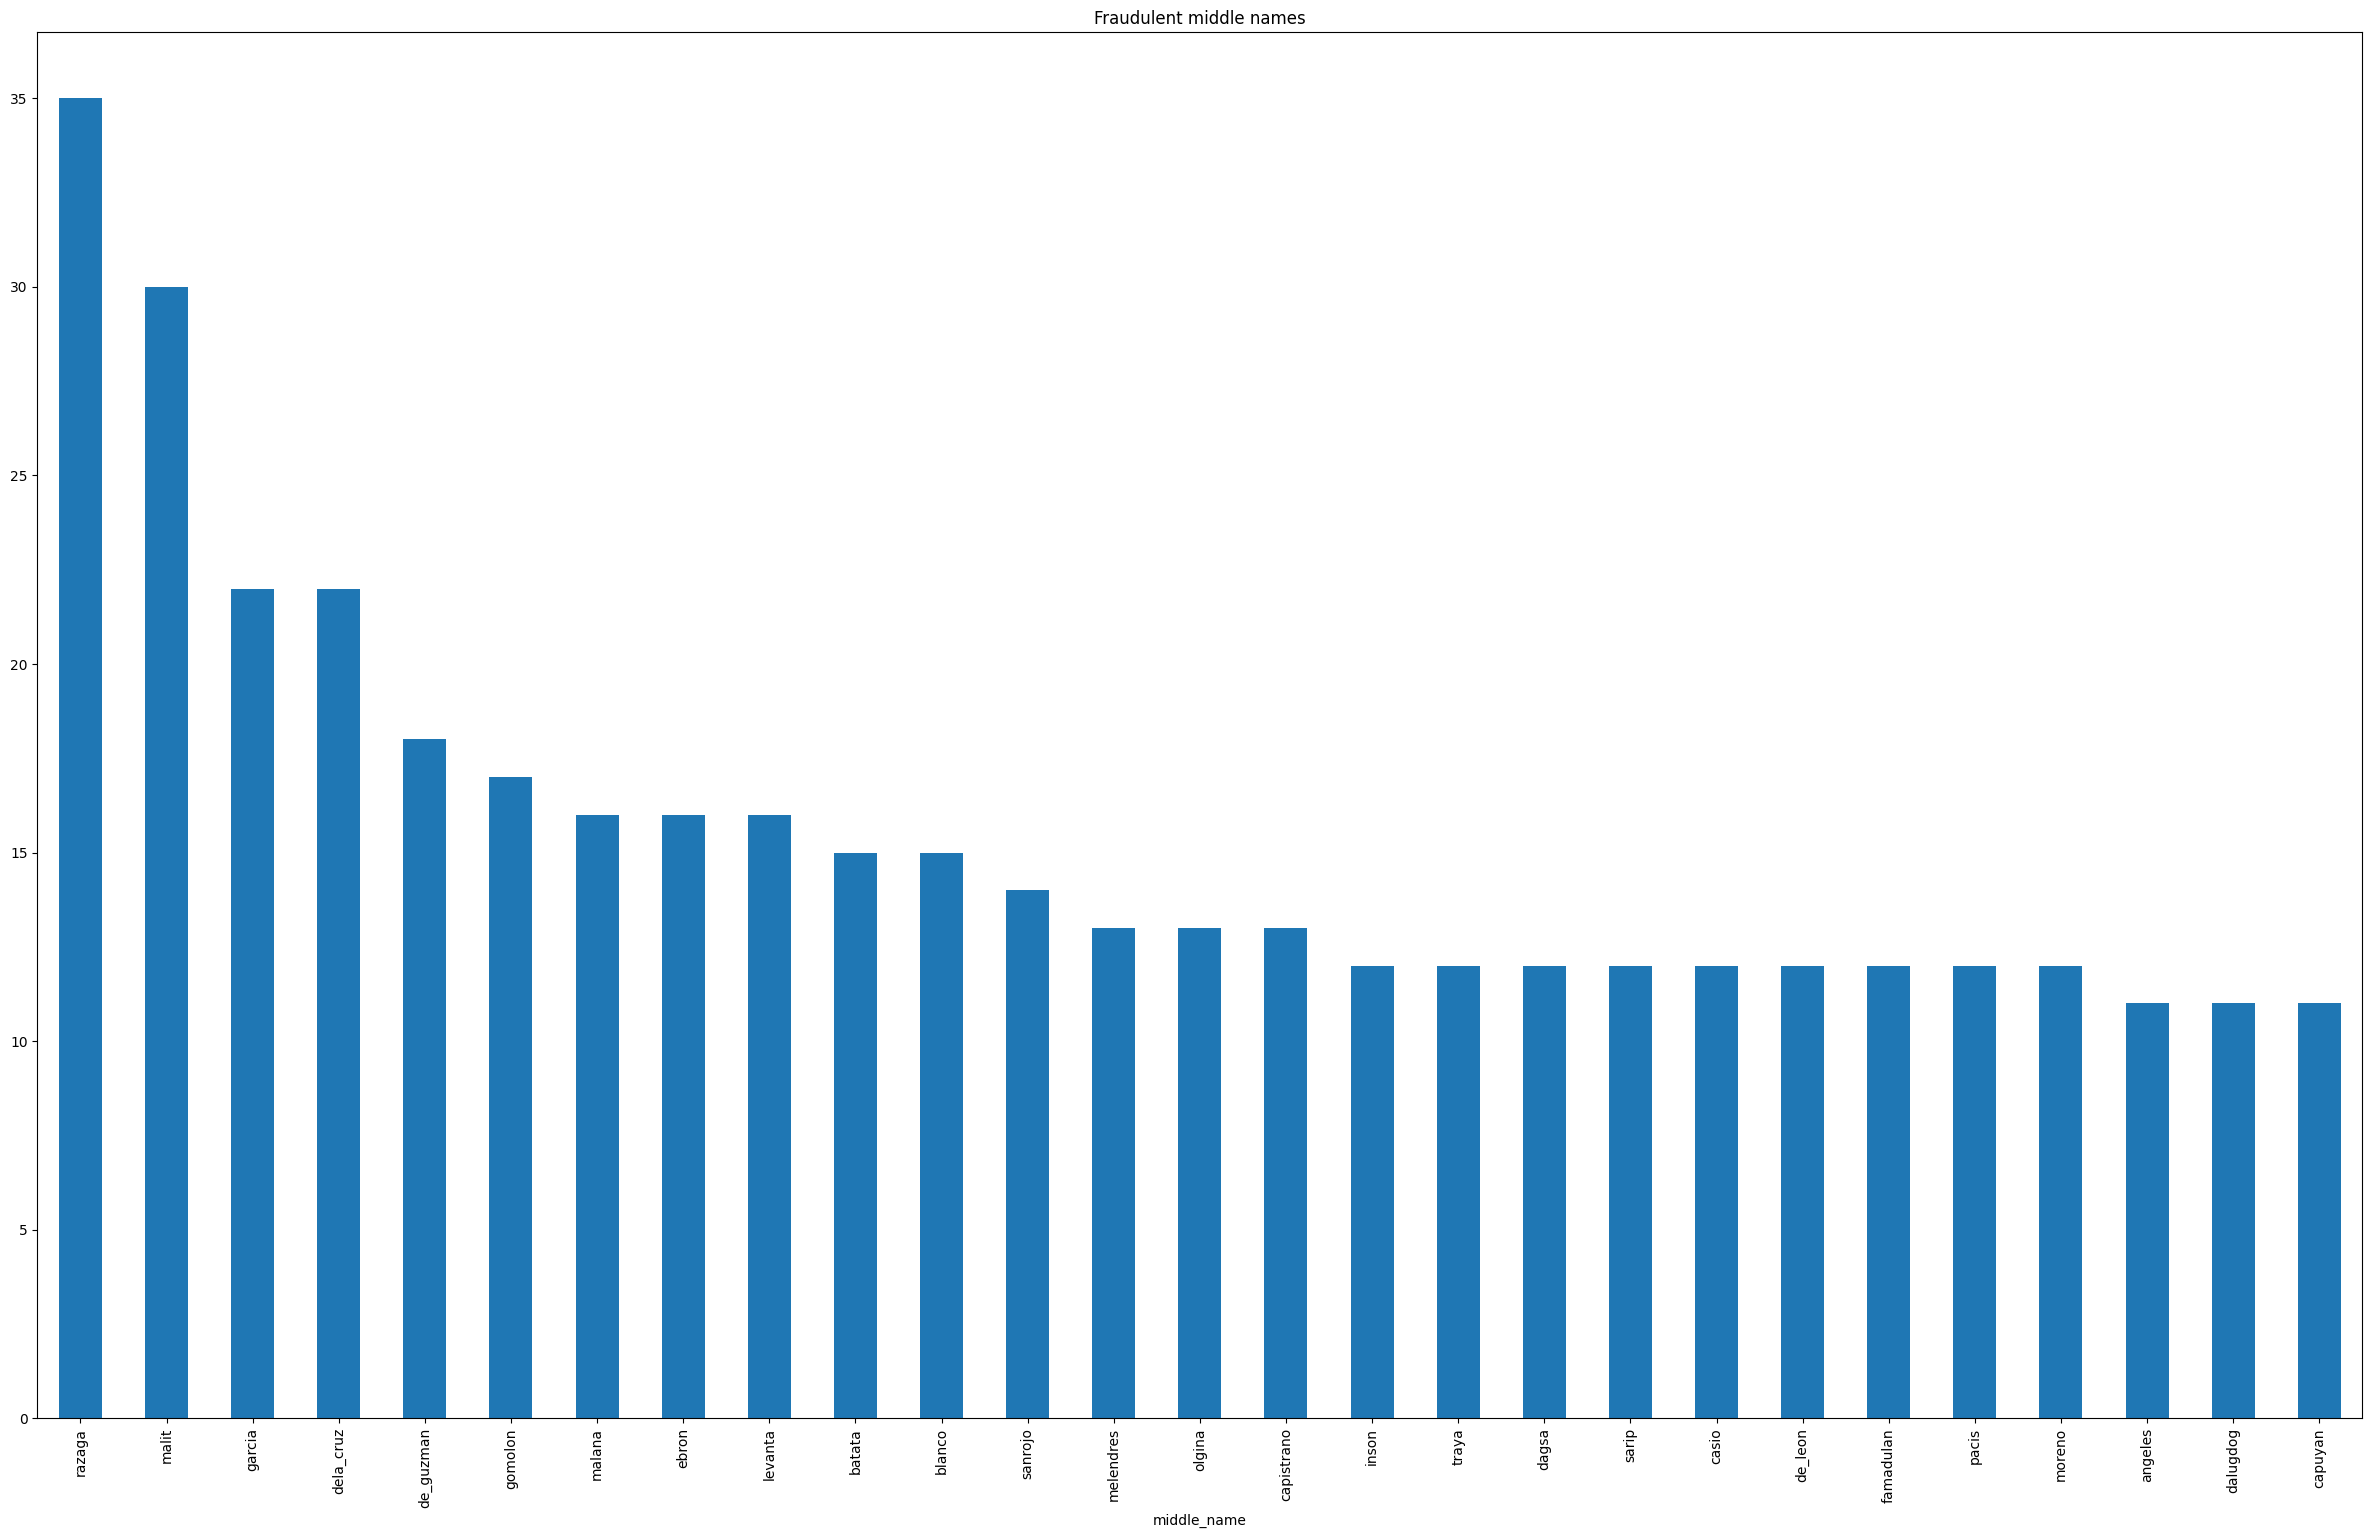

In [26]:
# Plot the number of fraudulent transactions per middle name
plt.figure(figsize=(30, 18))
fraud['middle_name'].value_counts().loc[lambda x: x > 10].plot(kind='bar', title='Fraudulent middle names')
plt.show()

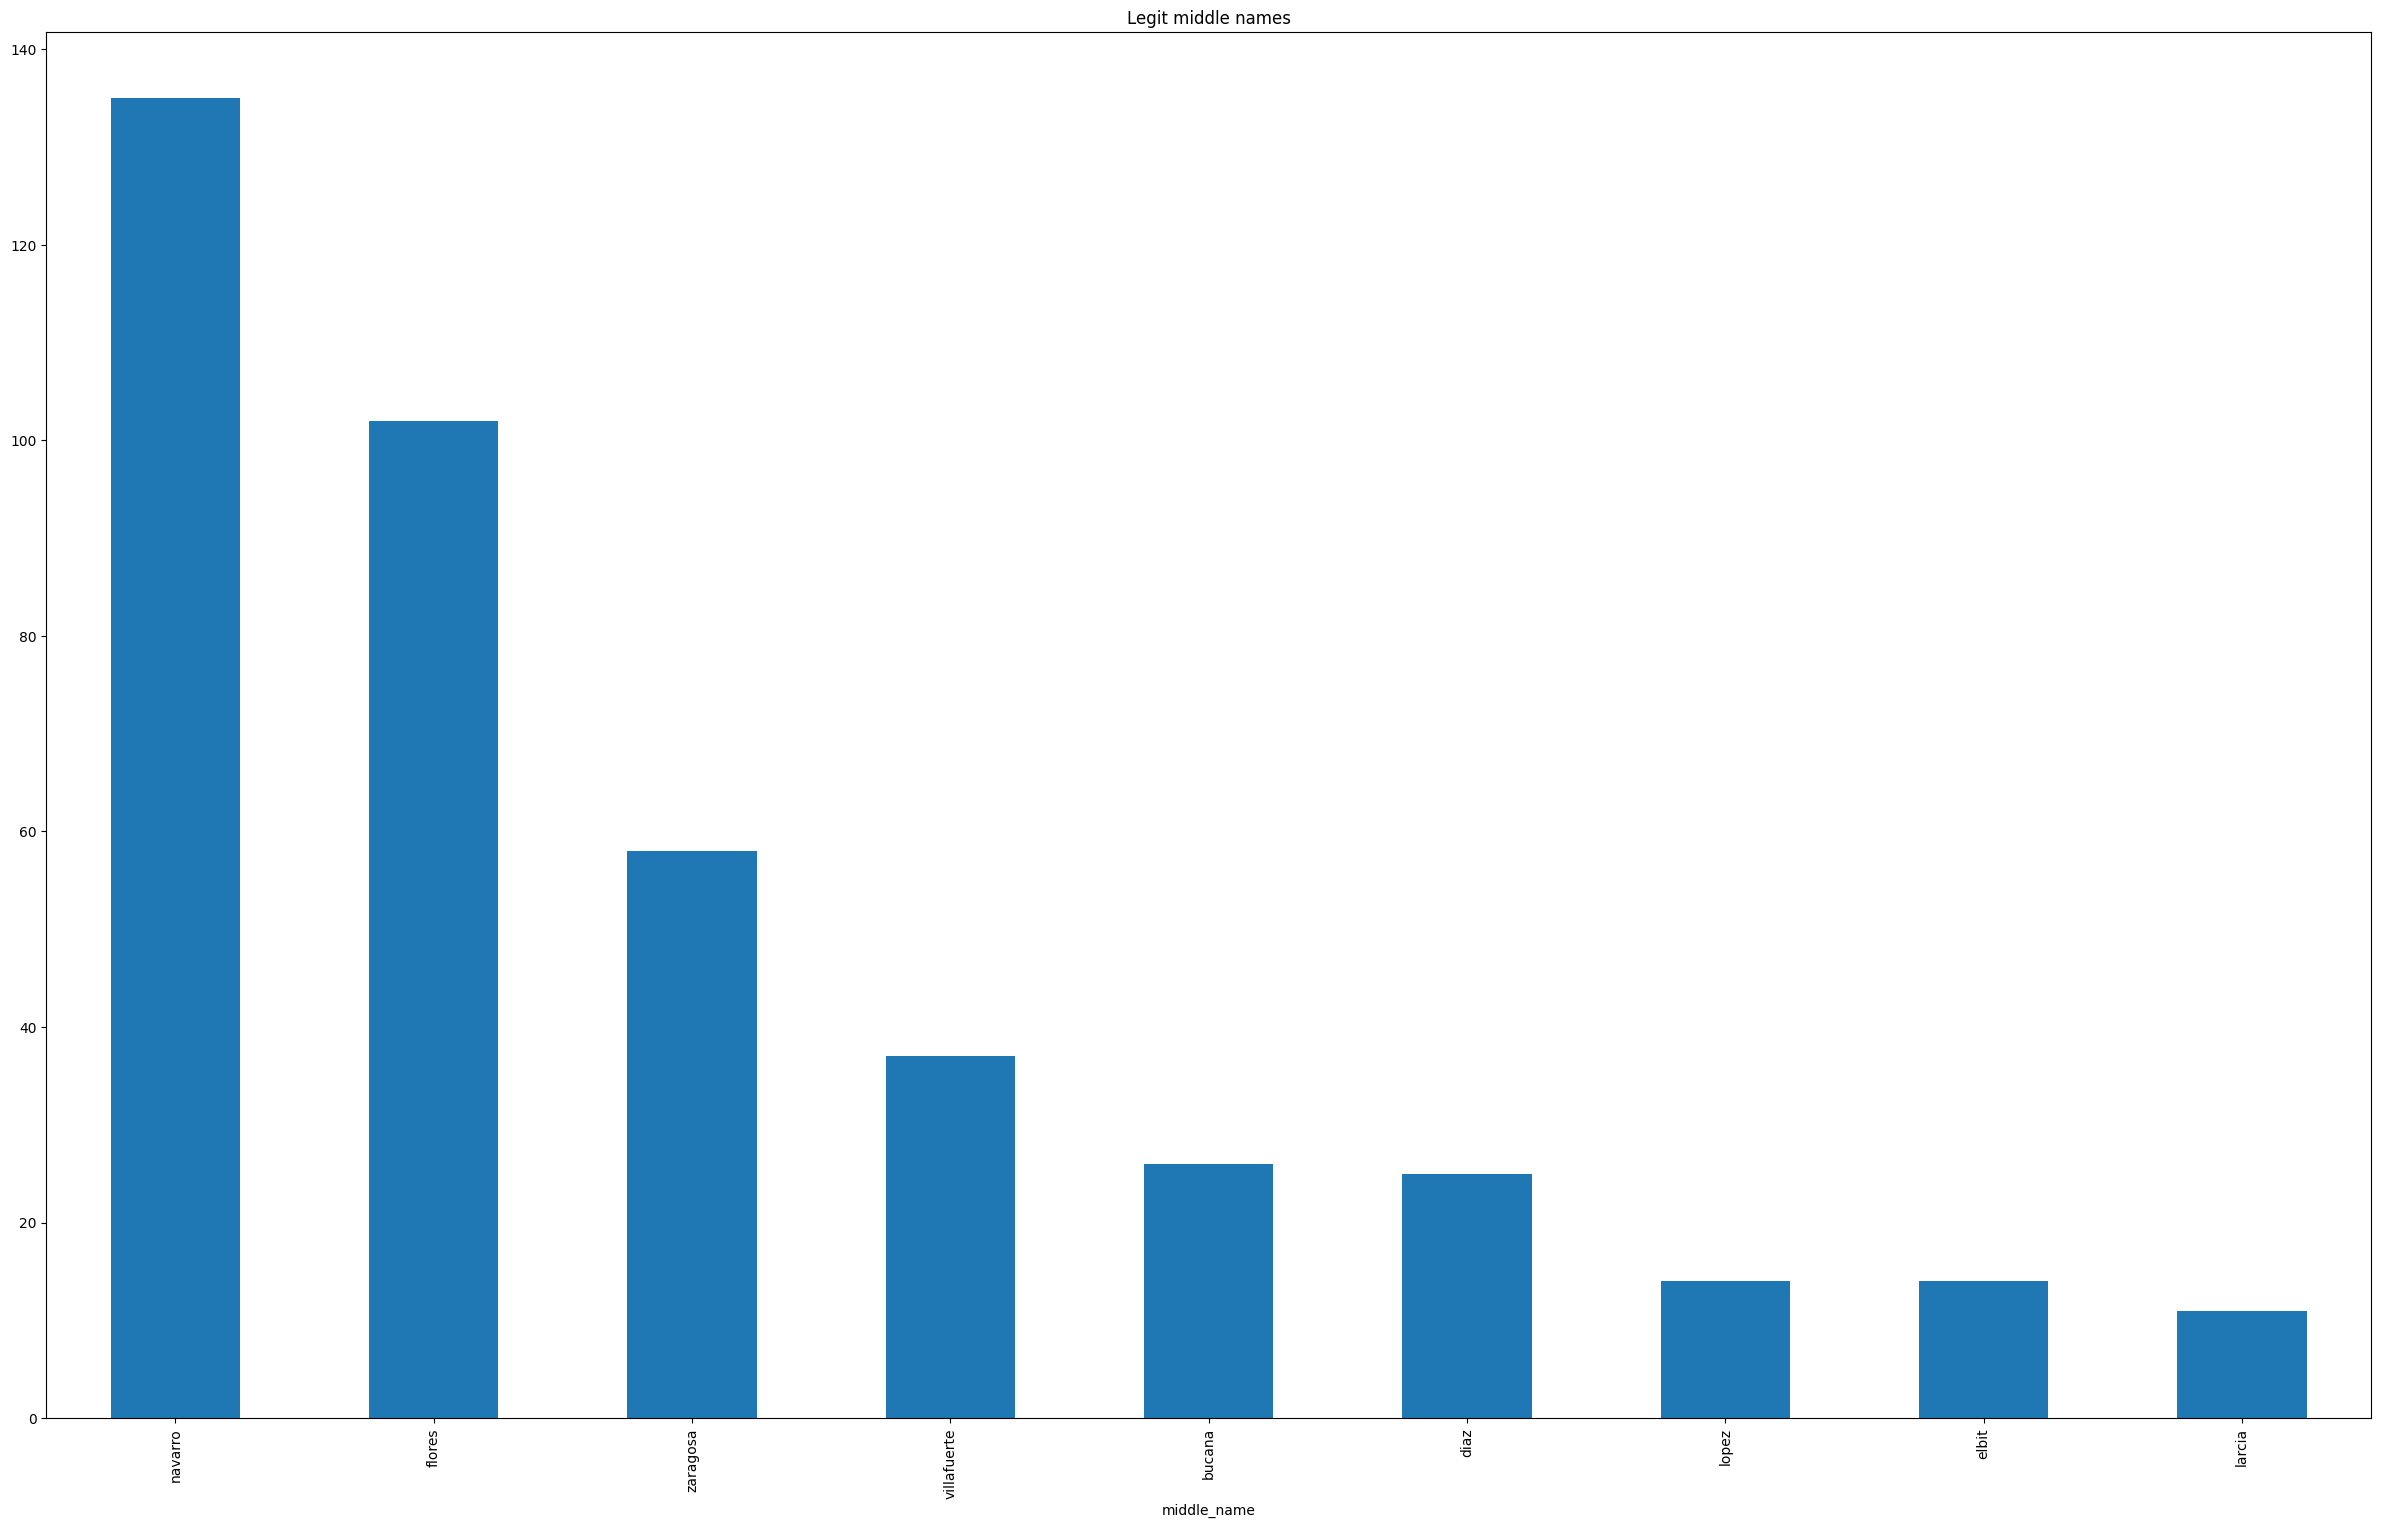

In [27]:
# Plot the number of legit transactions per middle name
plt.figure(figsize=(30, 18))
not_fraud['middle_name'].value_counts().loc[lambda x: x > 10].plot(kind='bar', title='Legit middle names')
plt.show()

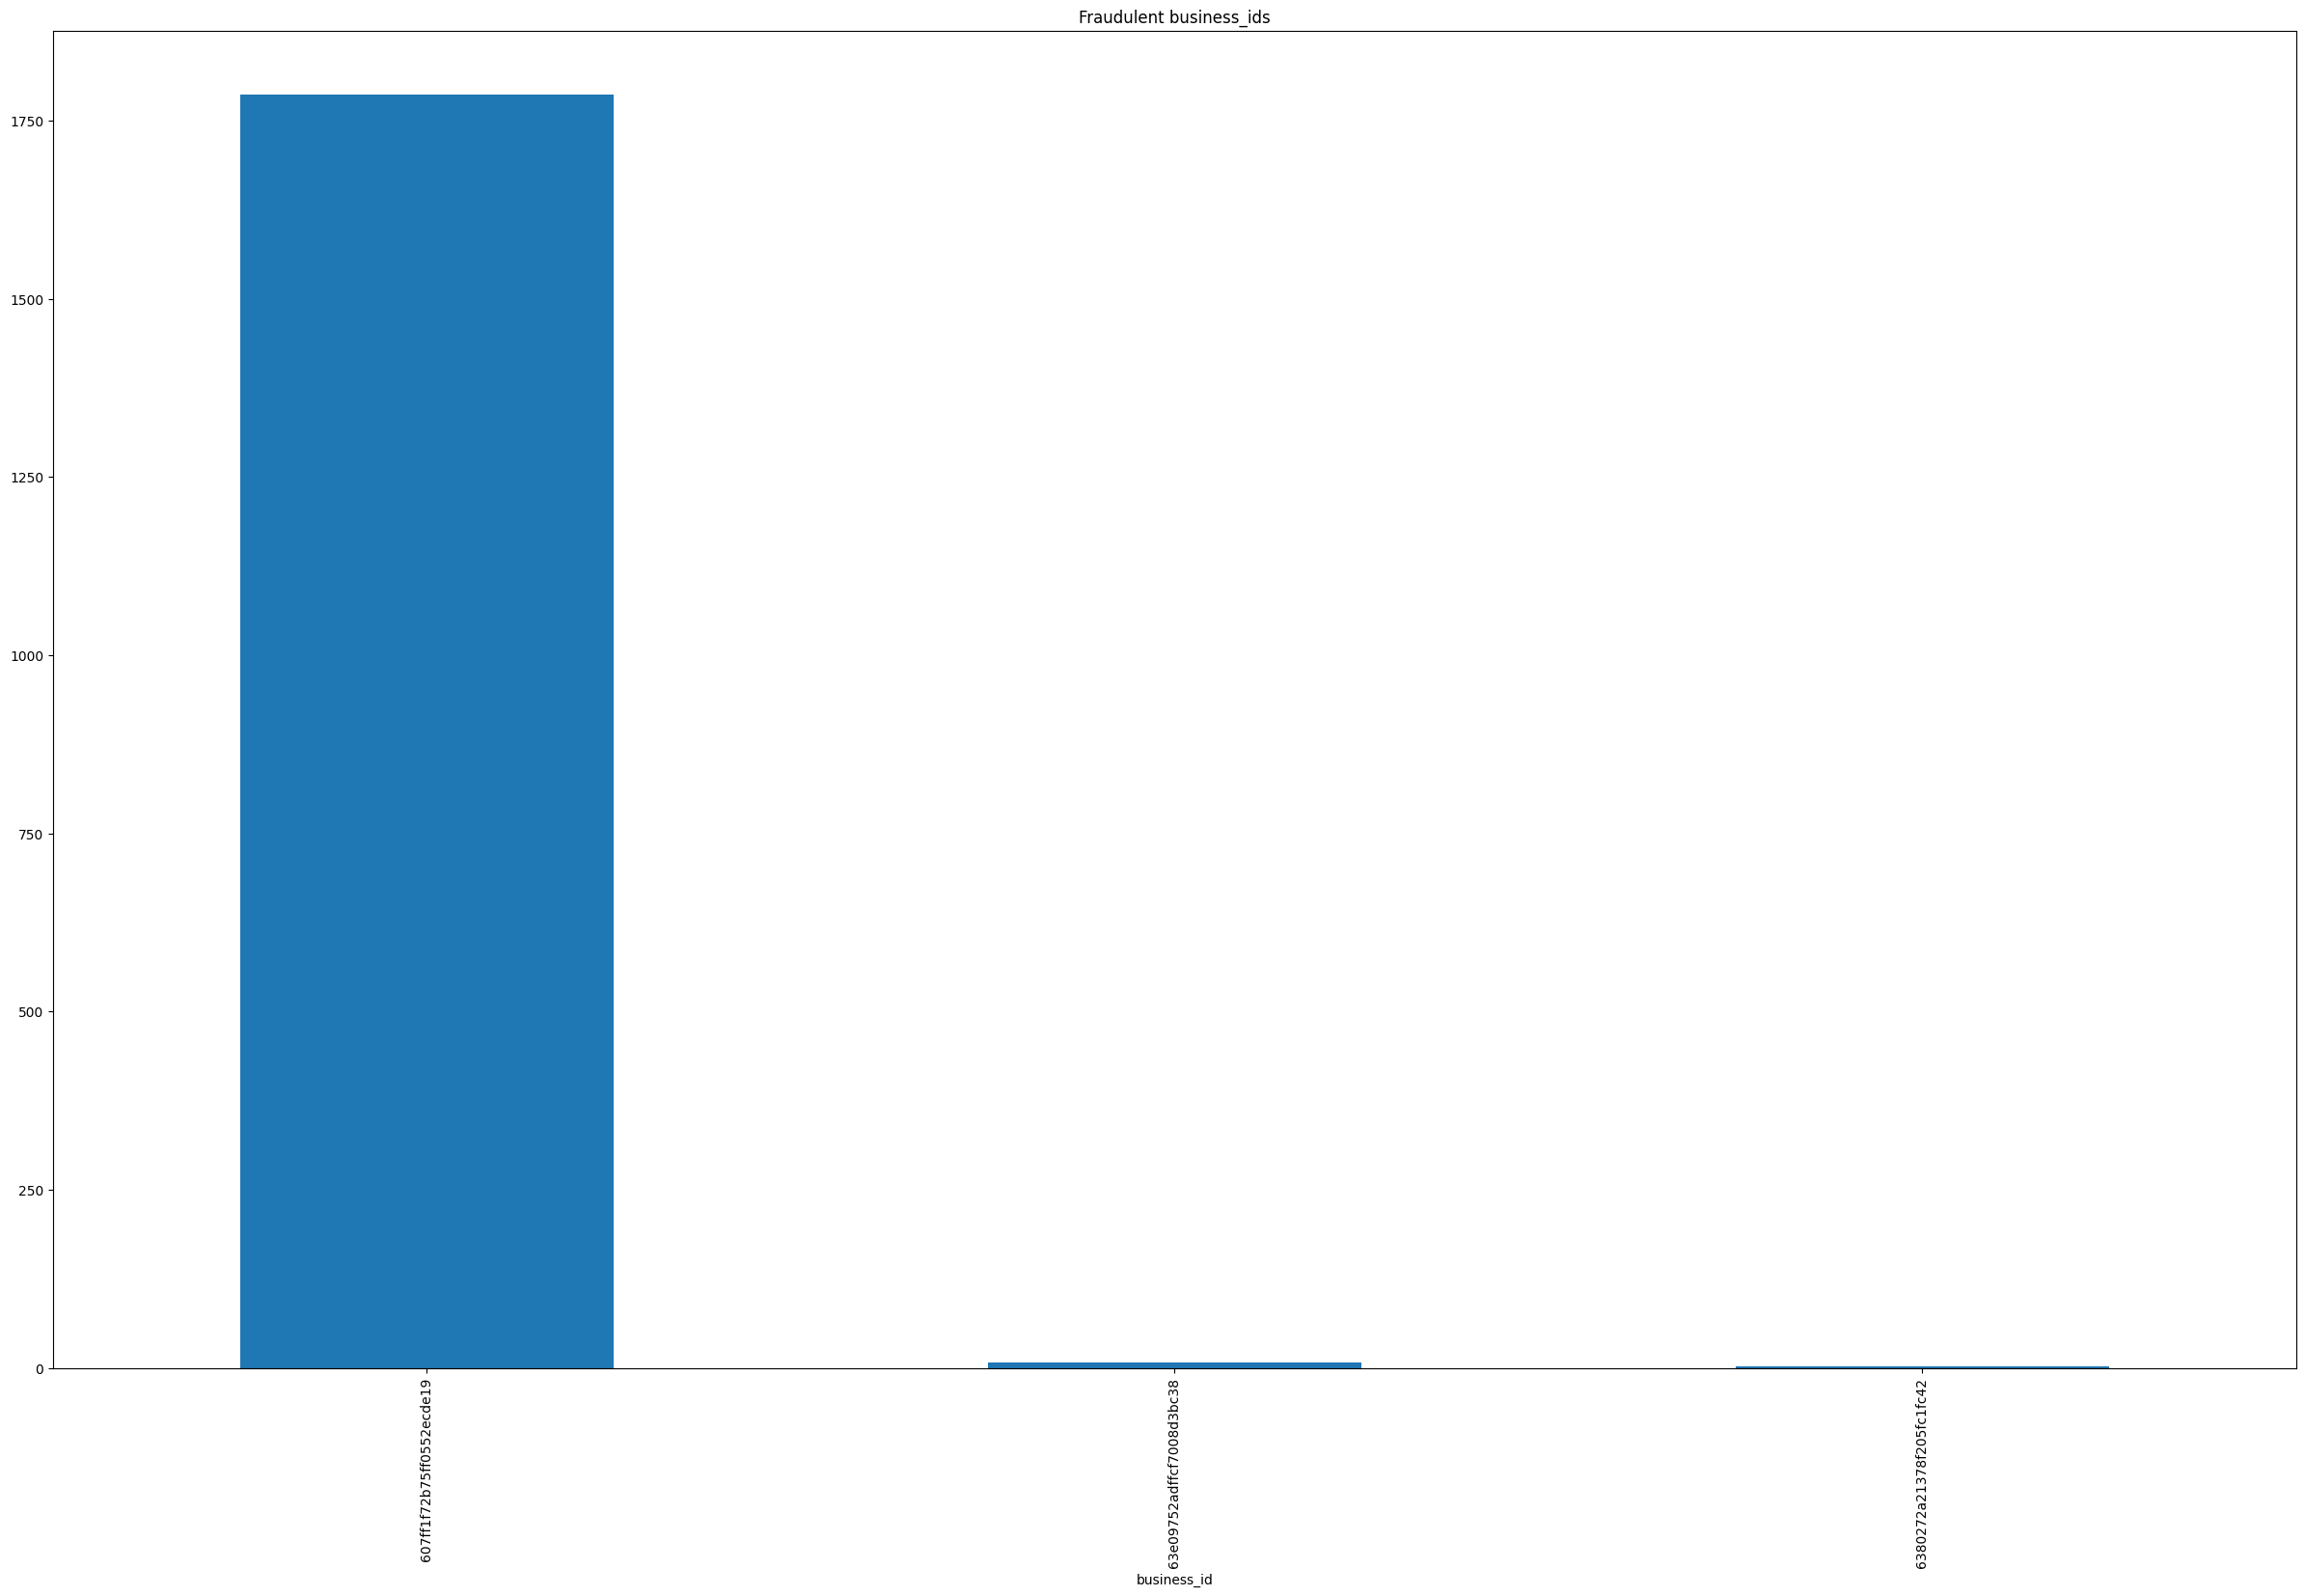

In [28]:
# Plot the number of fraudulent transactions per business_id
plt.figure(figsize=(30, 18))
fraud['business_id'].value_counts().loc[lambda x: x > 0].plot(kind='bar', title='Fraudulent business_ids')
plt.show()

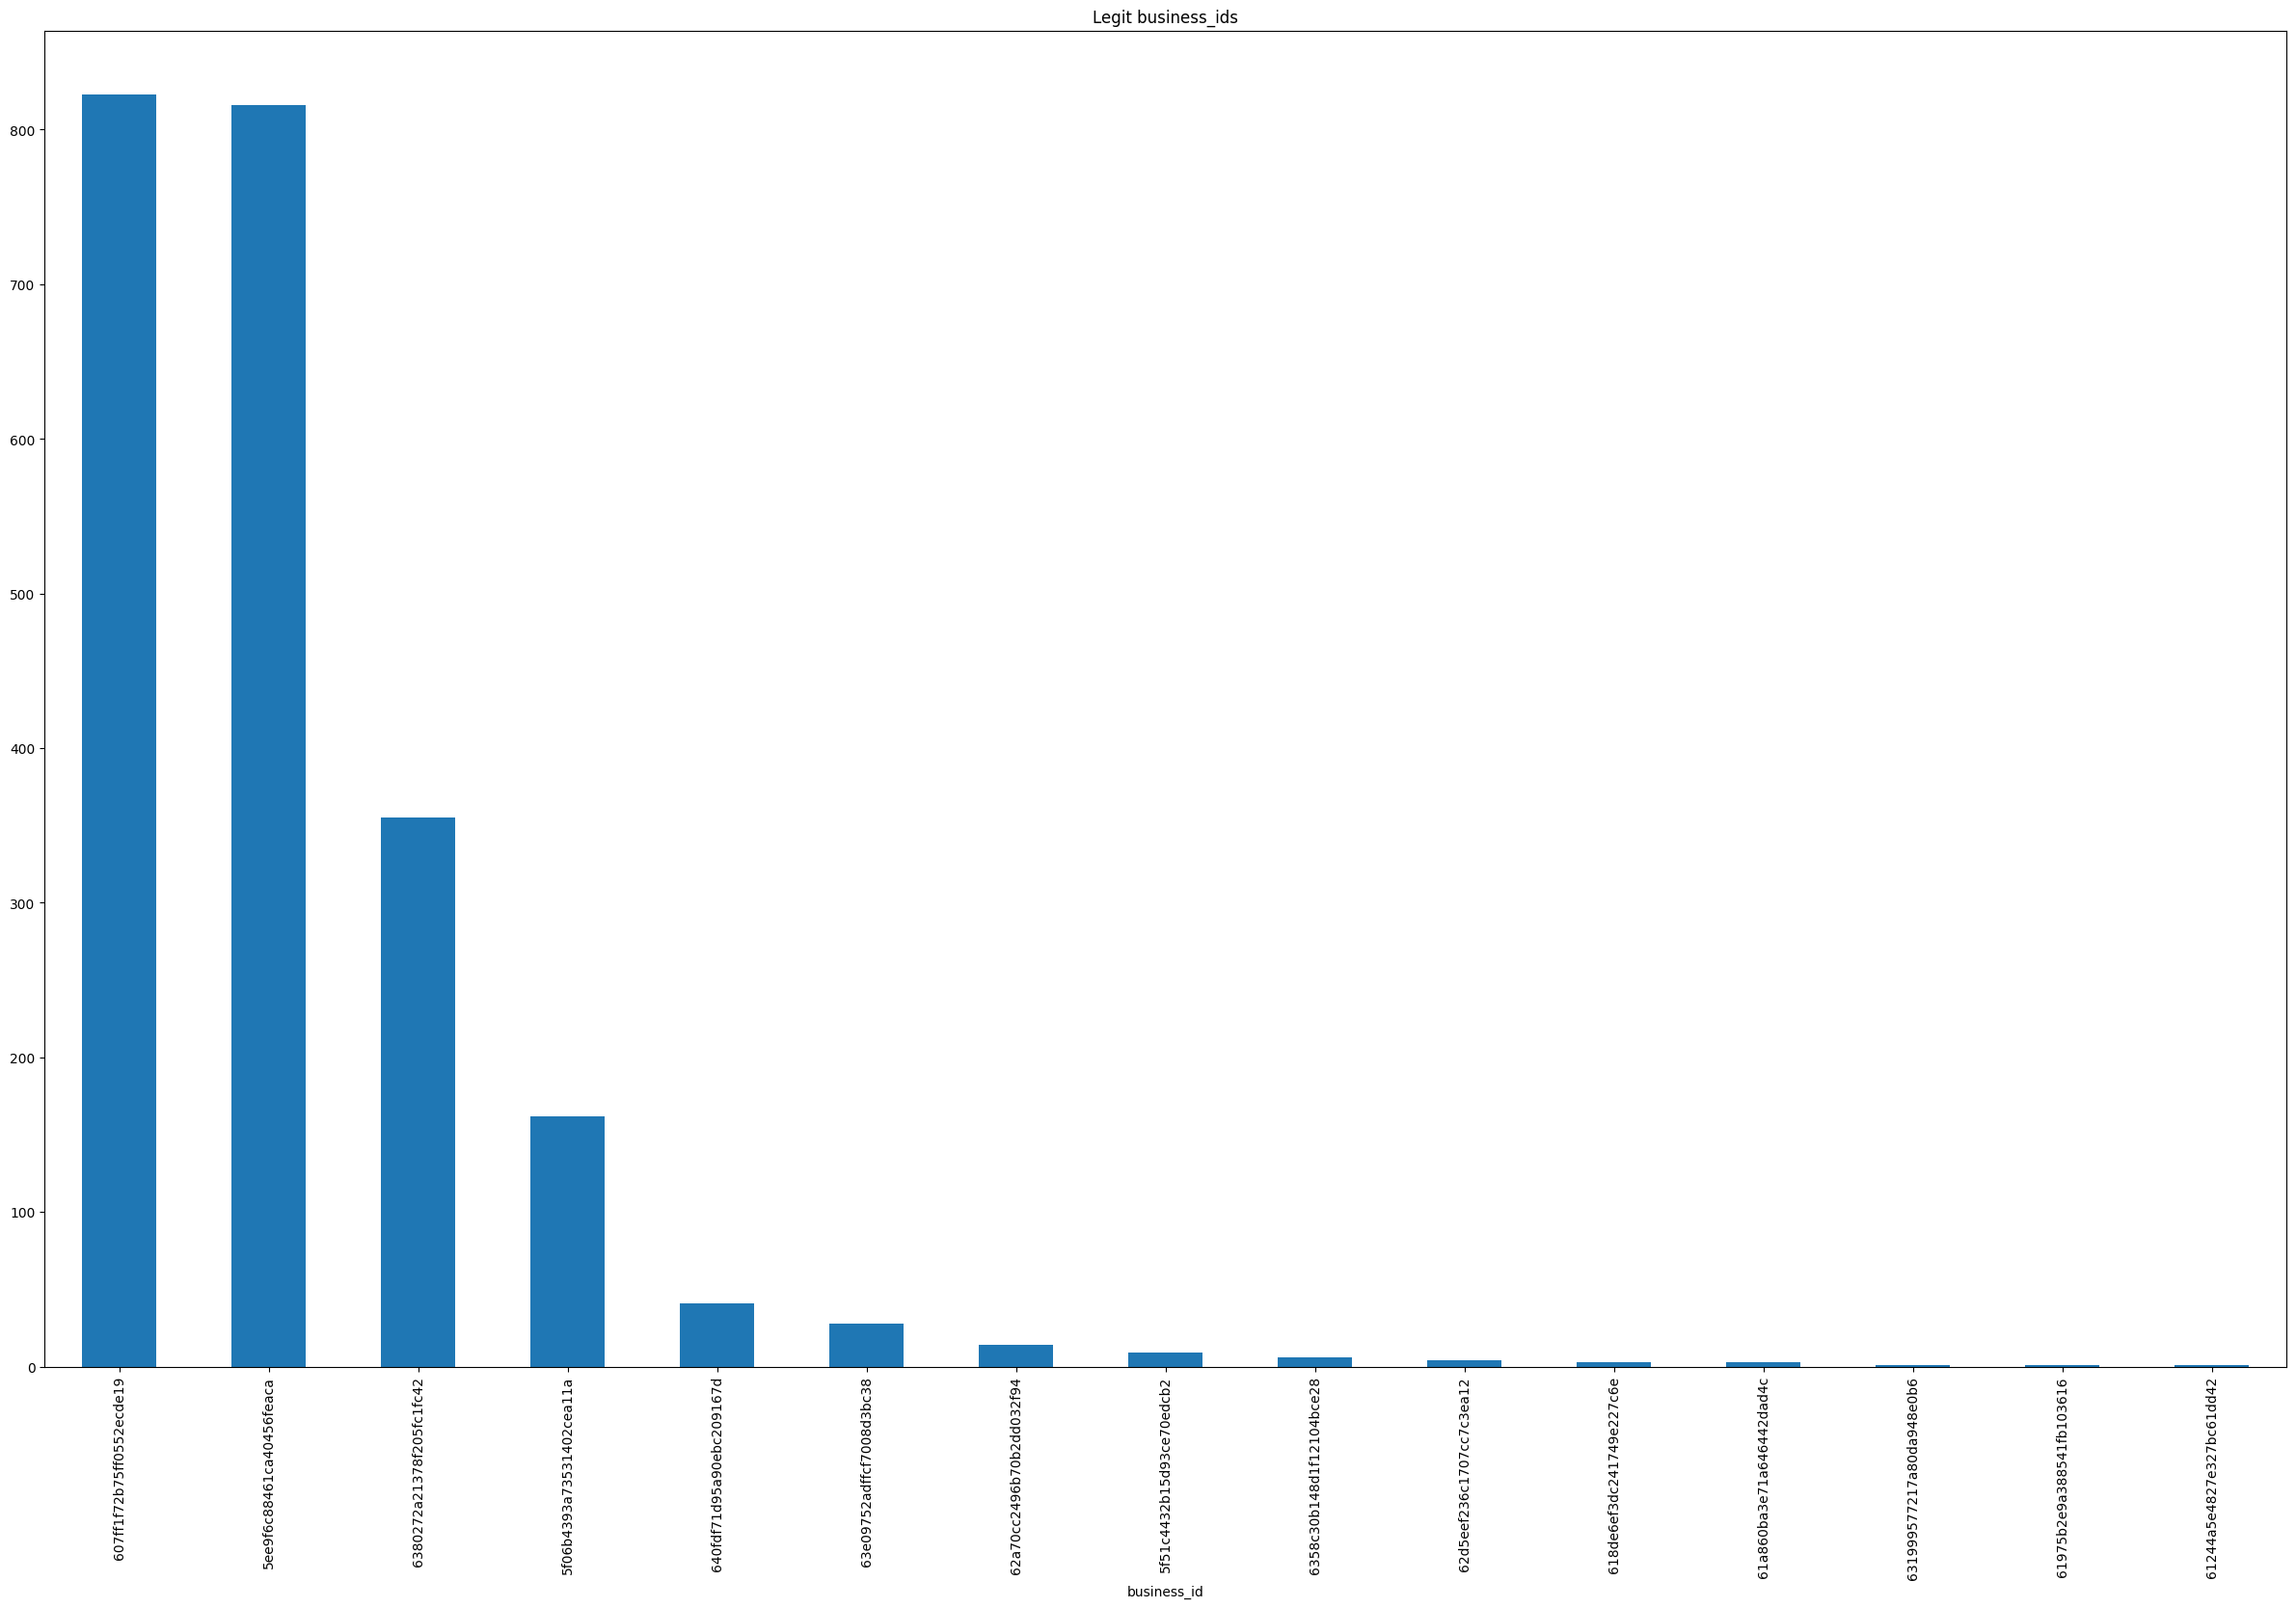

In [29]:
# Plot the number of legit transactions per business_id
plt.figure(figsize=(30, 18))
not_fraud['business_id'].value_counts().loc[lambda x: x > 0].plot(kind='bar', title='Legit business_ids')
plt.show()

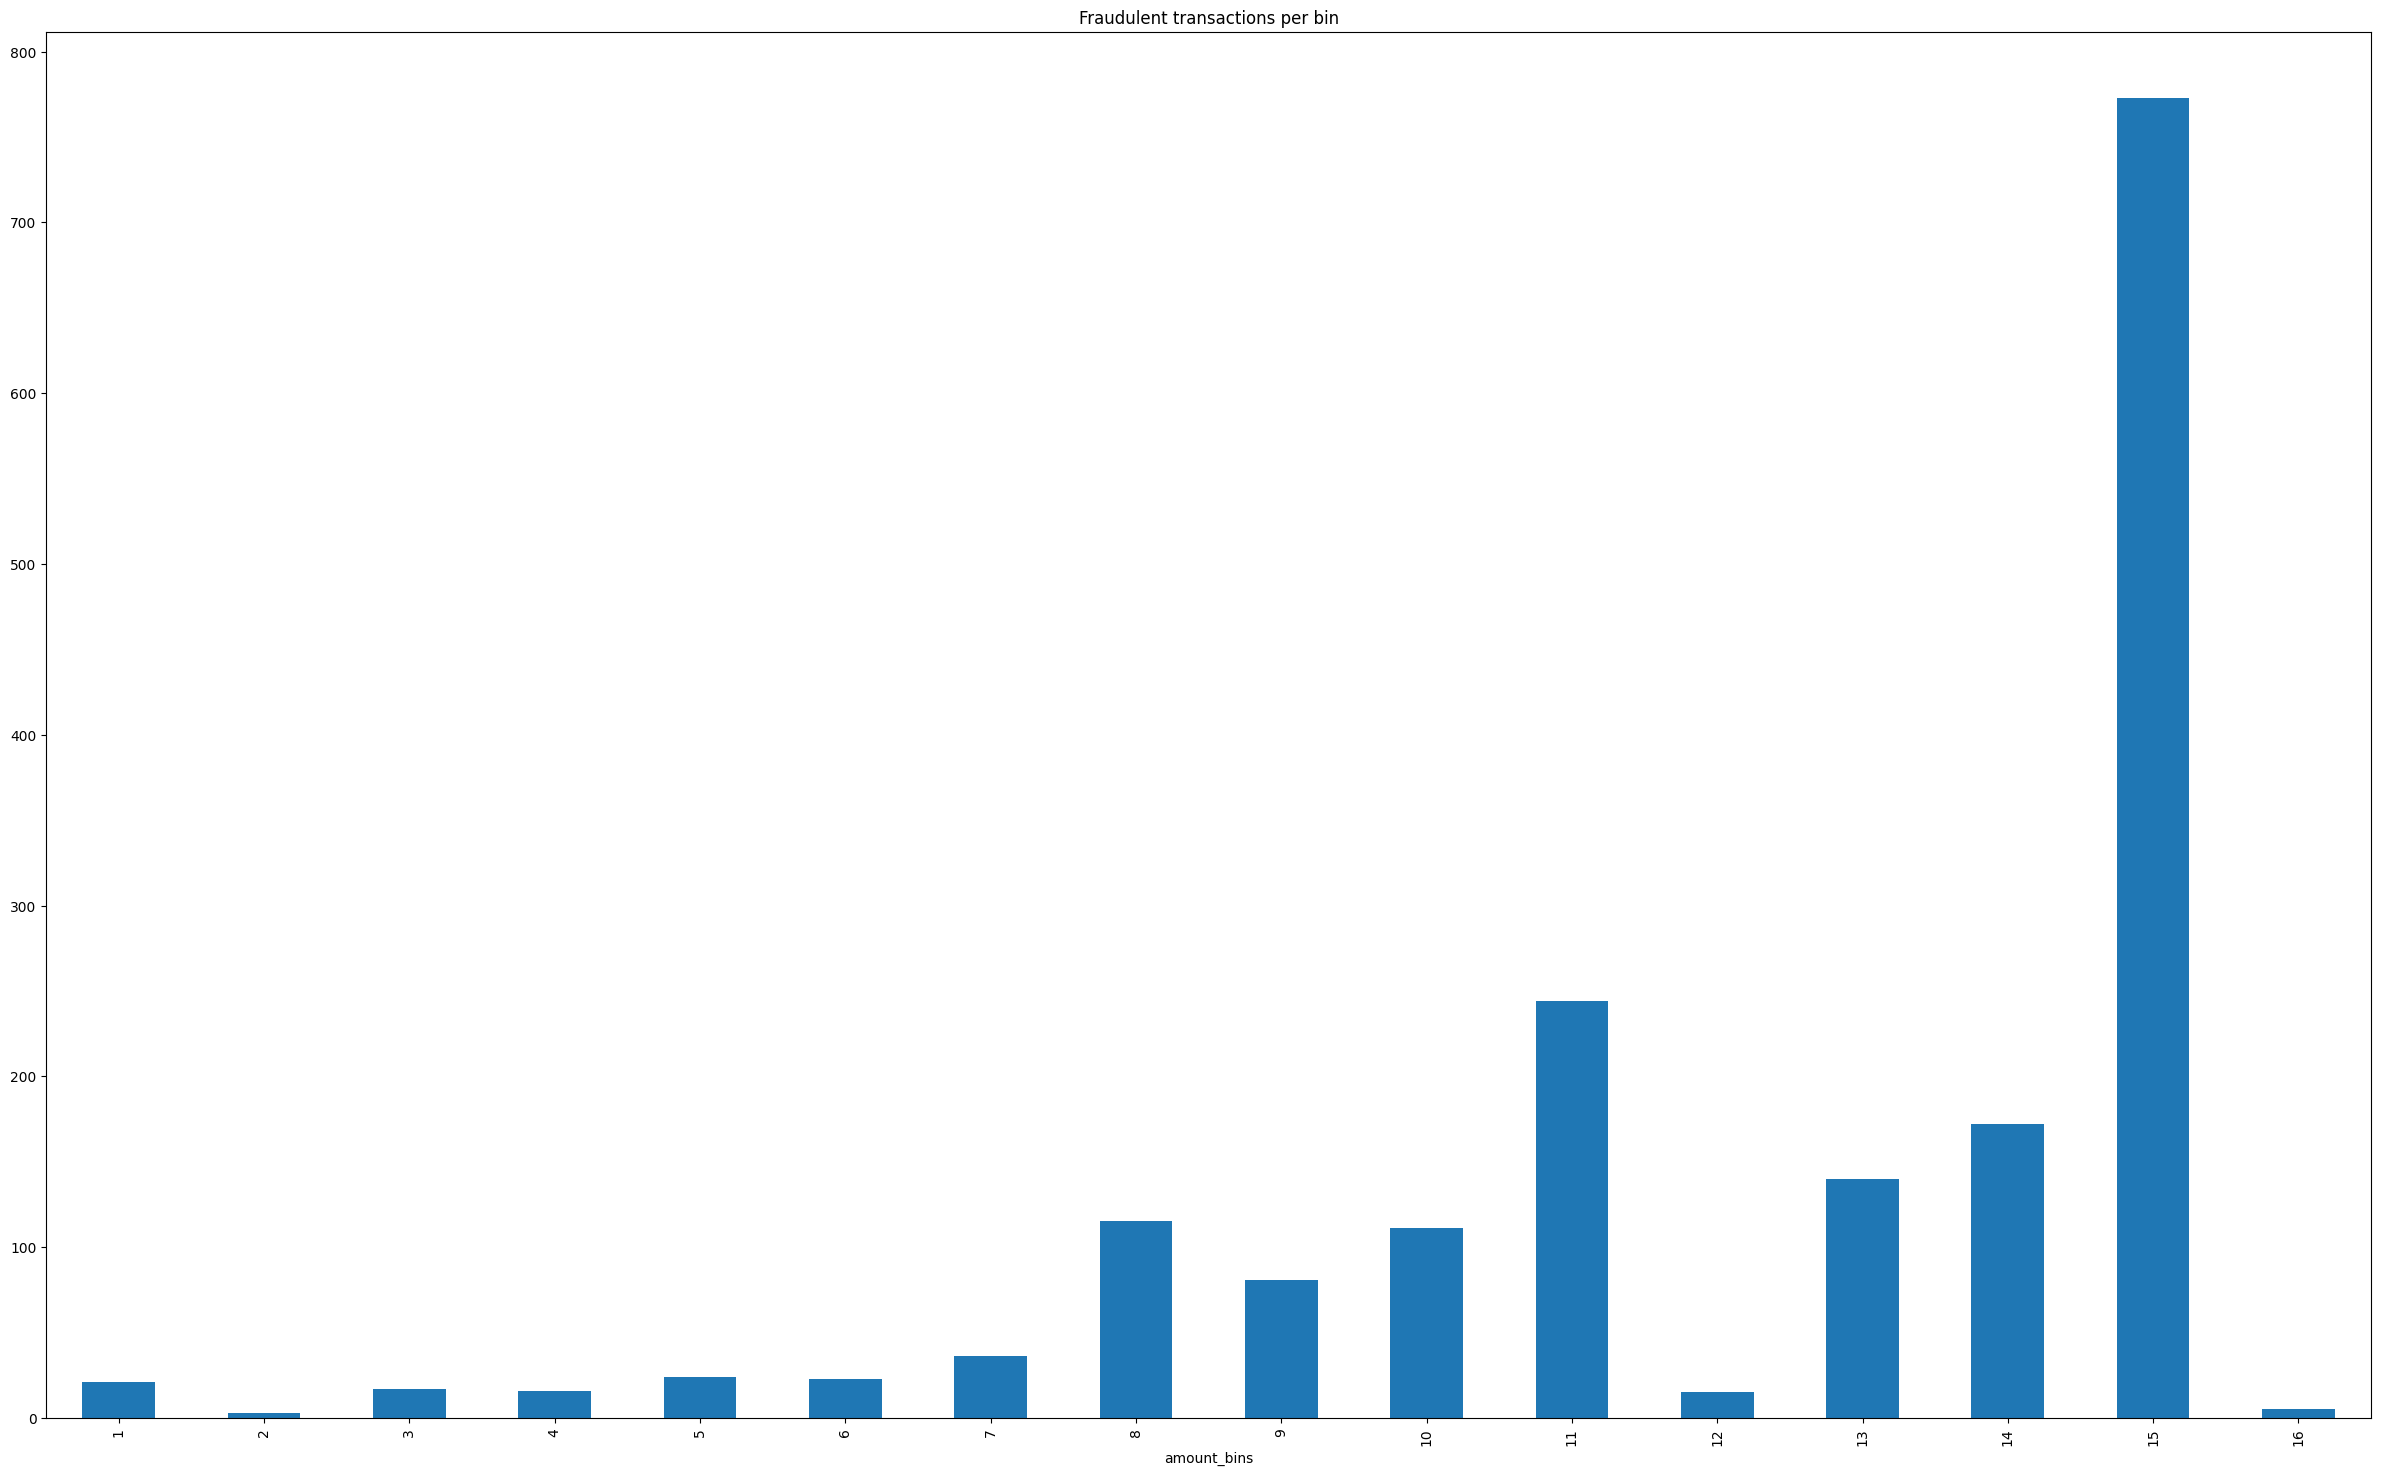

In [30]:
# Plot the number of fraud transactions per bin
plt.figure(figsize=(30, 18))
fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Fraudulent transactions per bin')
plt.show()

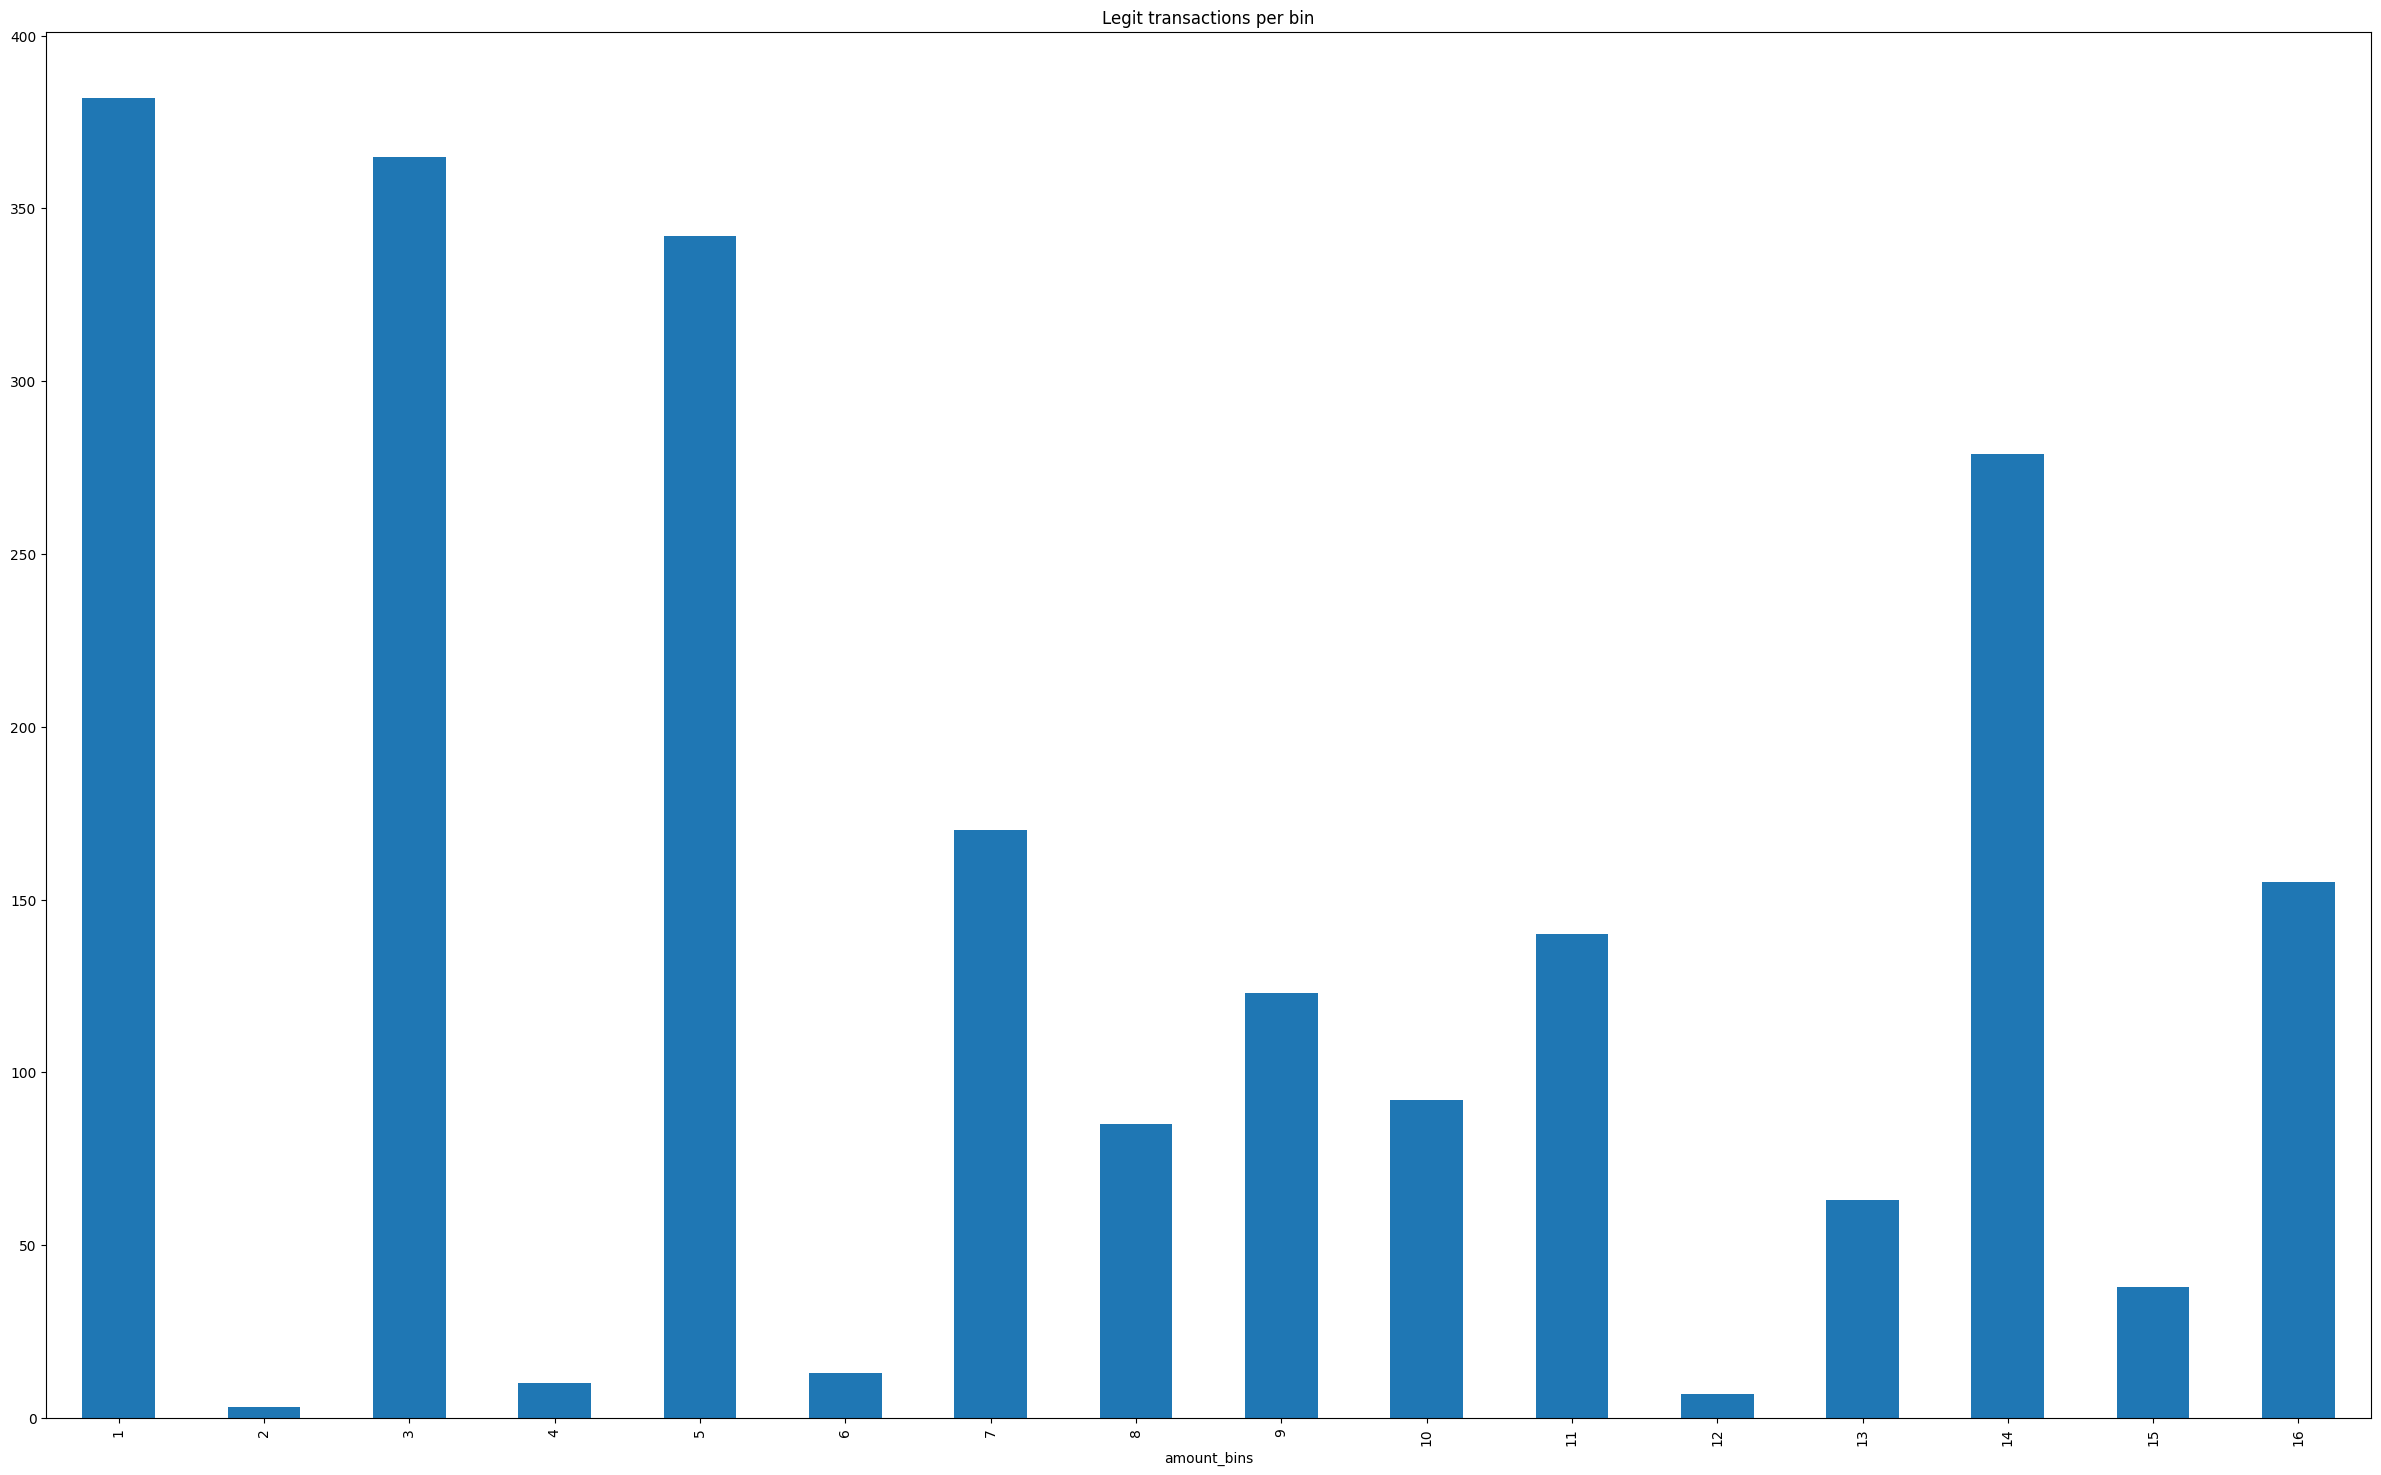

In [31]:
# Plot the number of legit transactions per bin
plt.figure(figsize=(30, 18))
not_fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Legit transactions per bin')
plt.show()

In [32]:

bin = 15
# Filter the DataFrame for bin
bin_range = fraud[fraud['amount_bins'] == bin]['amount']

# Print out the range of values in bin 8
print(f"Range of values in bin {bin}:")
print(f"Min value: {bin_range.min()}")
print(f"Max value: {bin_range.max()}")



Range of values in bin 15:
Min value: 20004.0
Max value: 20005.0


In [41]:
# Filter out 'surname' == 'tan'
df_filtered = df[df['surname'] == 'tan']
df_filtered = df_filtered[['surname', 'customer_id', 'account_hash','end_customer_id', 'is_fraud']]

In [42]:
# Compare columns
equal_rows = df['customer_id'] == df['end_customer_id']

# Count equal and not equal rows
num_equal = equal_rows.sum()
num_not_equal = len(df) - num_equal

# Print results
print(f"Number of equal rows: {num_equal}")
print(f"Number of not equal rows: {num_not_equal}")

Number of equal rows: 2748
Number of not equal rows: 1315
